<a href="https://colab.research.google.com/github/JoDeMiro/ImageProcessing/blob/main/16_Image_Face_Detection_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 14. Arc detektálás

Egy régi és egy új technikát fogok bemutatni.

Az egyik a Haar-Cascade technika a másik a mély gépi tanuláson - helyesen a konvolúciós neurális hálókon - alapul.

Ez a bemutató csak egy rövid kitekintés, ha időm engedi akkor ki fogom egészíteni és részeletes leírást illetve magyarázatot adok mindkét megoldásra.

In [1]:
import cv2
print(cv2.__version__)

4.1.2


In [2]:
import warnings
warnings.filterwarnings('ignore')

## Arc detektálás OpenCV cascade osztályozás segítségével

In [3]:
from cv2 import imread
from cv2 import CascadeClassifier

A fénykép betöltése

In [4]:
%%capture
!wget https://github.com/JoDeMiro/ImageProcessing/blob/main/images/woman2.jpg

In [27]:
import skimage
import skimage.io

image = skimage.io.imread('https://github.com/JoDeMiro/ImageProcessing/blob/main/images/woman2.jpg?raw=true')

b, g, r = cv2.split(image)

pixels = cv2.merge((r, g, b))

image = imread('woman2.jpg')

b, g, r = cv2.split(image)

pixels = cv2.merge((r, g, b))


Az előre feltanított model betöltése az OpenCV könyvtárból

In [28]:
classifier = CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

Az arc detektálás

In [29]:
bboxes = classifier.detectMultiScale(pixels)

Szövegdobozok rajzolása az arcok körül

In [30]:
for box in bboxes:
  print(box)

[147 214 707 707]


In [31]:
import matplotlib.pyplot

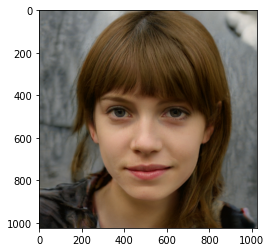

In [32]:
matplotlib.pyplot.imshow(pixels)

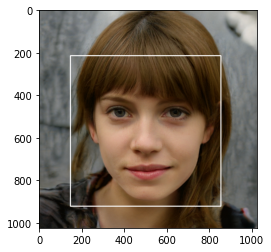

In [33]:
for box in bboxes:
  x, y, w, h = box
  x2, y2 = x + w, y + h

  cv2.rectangle(pixels, (x,y), (x2,y2), (255,255,255), 3)

matplotlib.pyplot.imshow(pixels)

## Arc detektálás CNN MTCNN segítségével

In [34]:
%%capture
!pip install mtcnn

In [35]:
!pip show mtcnn

Name: mtcnn
Version: 0.1.0
Summary: Multi-task Cascaded Convolutional Neural Networks for Face Detection, based on TensorFlow
Home-page: http://github.com/ipazc/mtcnn
Author: Iván de Paz Centeno
Author-email: ipazc@unileon.es
License: MIT
Location: /usr/local/lib/python3.7/dist-packages
Requires: opencv-python, keras
Required-by: 


In [47]:
import mtcnn
from mtcnn.mtcnn import MTCNN
import matplotlib.pyplot as plt

In [48]:
def draw_image_with_boxes(filename, result_list):
  # kép beolvasása
  image = matplotlib.pyplot.imread(filename)
  # megjelenítés
  plt.subplots(figsize = (10,10))
  matplotlib.pyplot.imshow(image)
  # koordináták a szövegdobozhoz
  ax = matplotlib.pyplot.gca()
  # minden egyes dobozra
  for result in result_list:
    # kérje le a koordinátákat
    x, y, w, h = result['box']
    # szövegdoboz
    rectangle = matplotlib.patches.Rectangle((x, y), w, h, fill = False, color = 'white')
    # hozzáadás
    ax.add_patch(rectangle)
  # megjelenítés
  matplotlib.pyplot.show()

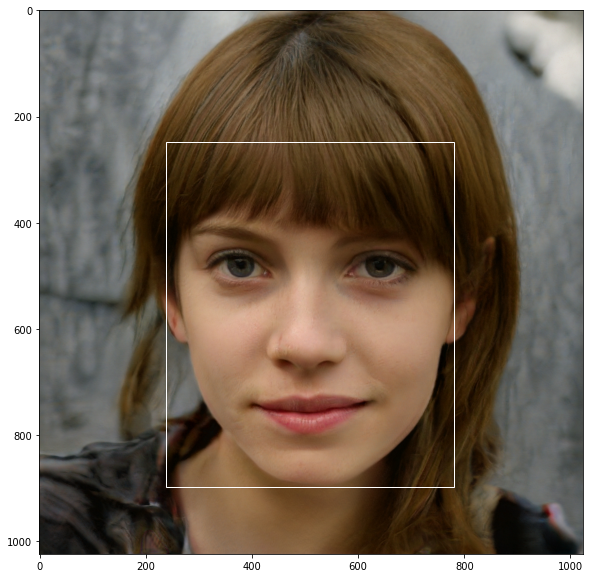

In [79]:
filename = 'woman2.jpg'

pixels = matplotlib.pyplot.imread(filename)

pixels = skimage.io.imread('https://github.com/JoDeMiro/ImageProcessing/blob/main/images/woman2.jpg?raw=true')


# Arc detektálás model az alapbeállításokkal
detector = MTCNN()

# Arc detektálása a képen
faces = detector.detect_faces(pixels)

# Az eredeti kép és a felismert objektum megjelenítése
draw_image_with_boxes(filename, faces)

In [43]:

!wget https://github.com/JoDeMiro/ImageProcessing/blob/main/images/people1.jpg


--2021-06-09 19:21:11--  https://github.com/JoDeMiro/ImageProcessing/blob/main/images/people1.jpg
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘people1.jpg.1’

people1.jpg.1           [ <=>                ] 109.00K  --.-KB/s    in 0.02s   

2021-06-09 19:21:12 (4.49 MB/s) - ‘people1.jpg.1’ saved [111619]



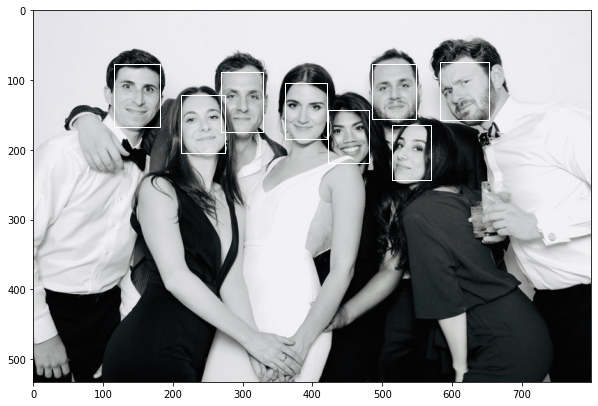

In [78]:

filename = 'people1.jpg'

pixels = matplotlib.pyplot.imread(filename)

pixels = skimage.io.imread('https://github.com/JoDeMiro/ImageProcessing/blob/main/images/people1.jpg?raw=true')


# Arc detektálás model az alapbeállításokkal
detector = MTCNN()

# Arc detektálása a képen
faces = detector.detect_faces(pixels)

# Az eredeti kép és a felismert objektum megjelenítése
draw_image_with_boxes(filename, faces)

In [52]:

!wget https://github.com/JoDeMiro/ImageProcessing/blob/main/images/people2.jpg


--2021-06-09 19:46:23--  https://github.com/JoDeMiro/ImageProcessing/blob/main/images/people2.jpg
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘people2.jpg.1’

people2.jpg.1           [ <=>                ] 109.00K  --.-KB/s    in 0.02s   

2021-06-09 19:46:23 (4.64 MB/s) - ‘people2.jpg.1’ saved [111618]



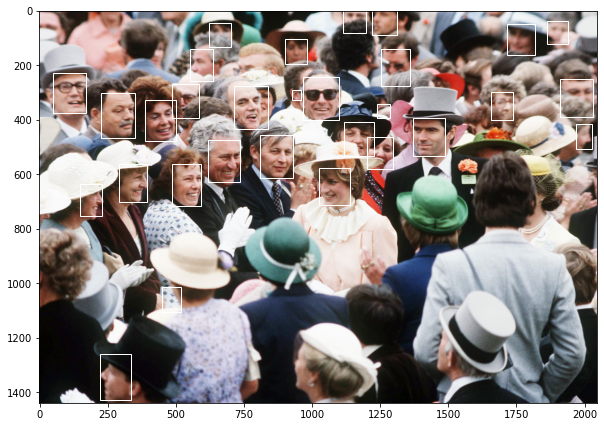

In [77]:
filename = 'people2.jpg'

pixels = matplotlib.pyplot.imread(filename)

pixels = skimage.io.imread('https://github.com/JoDeMiro/ImageProcessing/blob/main/images/people2.jpg?raw=true')

# Arc detektálás model az alapbeállításokkal
detector = MTCNN()

# Arc detektálása a képen
faces = detector.detect_faces(pixels)

# Az eredeti kép és a felismert objektum megjelenítése
draw_image_with_boxes(filename, faces)

## Arc detektálás és kulcspontok

In [84]:
def draw_image_with_features(filename, result_list, dot_radius = 3):
  # kép beolvasása
  image = matplotlib.pyplot.imread(filename)
  # megjelenítés
  plt.subplots(figsize = (10,10))
  matplotlib.pyplot.imshow(image)
  # koordináták a szövegdobozhoz
  ax = matplotlib.pyplot.gca()
  # minden egyes dobozra
  for result in result_list:
    # kérje le a koordinátákat
    x, y, w, h = result['box']
    # szövegdoboz
    rectangle = matplotlib.patches.Rectangle((x, y), w, h, fill = False, color = 'white')
    # hozzáadás
    ax.add_patch(rectangle)
    # minden egyes kulcspontra
    for key, value in result['keypoints'].items():
      # pontok rajzolása
      dot = matplotlib.patches.Circle(value, radius = dot_radius, color = 'white')
      ax.add_patch(dot)
  # megjelenítés
  matplotlib.pyplot.show()

  return result['keypoints'].items()

In [85]:
import warnings
warnings.filterwarnings('ignore')

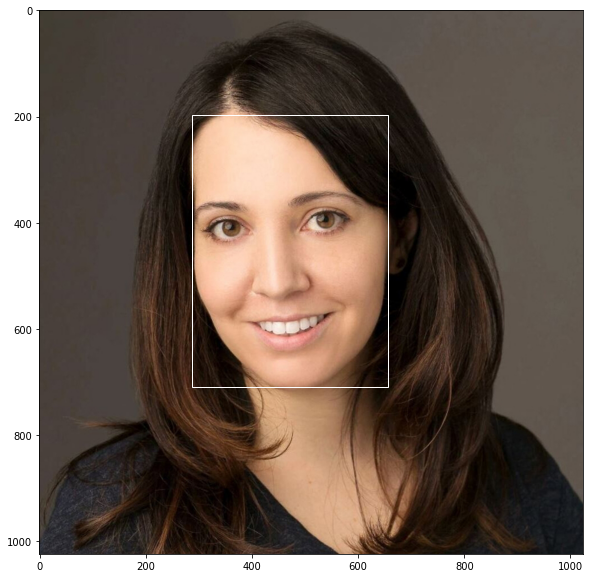

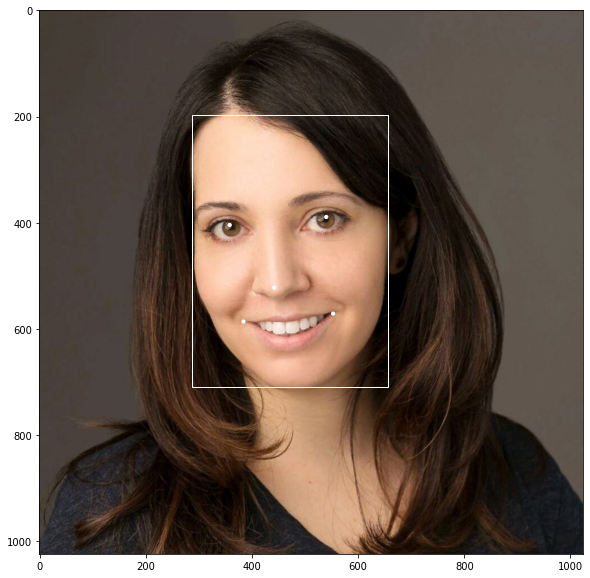

In [109]:
filename = 'woman3.jpg'

pixels = matplotlib.pyplot.imread(filename)

pixels = skimage.io.imread('https://github.com/JoDeMiro/ImageProcessing/blob/main/images/woman3.jpg?raw=true')

# Arc detektálás model az alapbeállításokkal
detector = MTCNN()

# Arc detektálása a képen
faces = detector.detect_faces(pixels)

# Az eredeti kép és a felismert objektum megjelenítése
draw_image_with_boxes(filename, faces)

# Az eredeti kép a kulcspontokkal
p = draw_image_with_features(filename, faces)

## A kulcspontok

In [92]:
for key, value in p:
    # kulcspontok
    tab = '\t'
    if(len(key) < 5):
      tab = '\t\t'
    print(key, tab, value)

left_eye 	 (384, 483)
right_eye 	 (638, 486)
nose 		 (507, 645)
mouth_left 	 (399, 740)
mouth_right 	 (630, 736)
